# `tortuosity_fd`

This function solves Fickian diffusion on the image using the voxel as the grid to find the tortuosity. The function uses finite differences hence the `_fd` suffix. 

$$ N_A = D_{eff} \frac{A}{L} \Delta C_A $$

where $D_{eff} = \frac{\varepsilon}{\tau}$

## `im`

`im` defines the grid on which the simulation occurs. All voxels which are `True` are used as the grid. An image of all `True` values would return a tortuosity of 1.0 since there are no obstacles. 

The function returns a `Results` object, with several pieces of information attached as attributes. Printing the object provides a formatted list of the attributes, which includes the computed tortuosity as well as the image of the computed concentration field:

In [9]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

im = np.ones([100, 100], dtype=bool)
fd = ps.simulations.tortuosity_fd(im, axis=0)
print(fd)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of tortuosity_fd generated at Sat Jul 12 21:19:21 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Array of size (100, 100)
tortuosity                0.9999984178777721
formation_factor          0.9999984178777721
original_porosity         1.0
effective_porosity        1.0
im_conc                   Array of size (100, 100)
time                      0.026360417
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


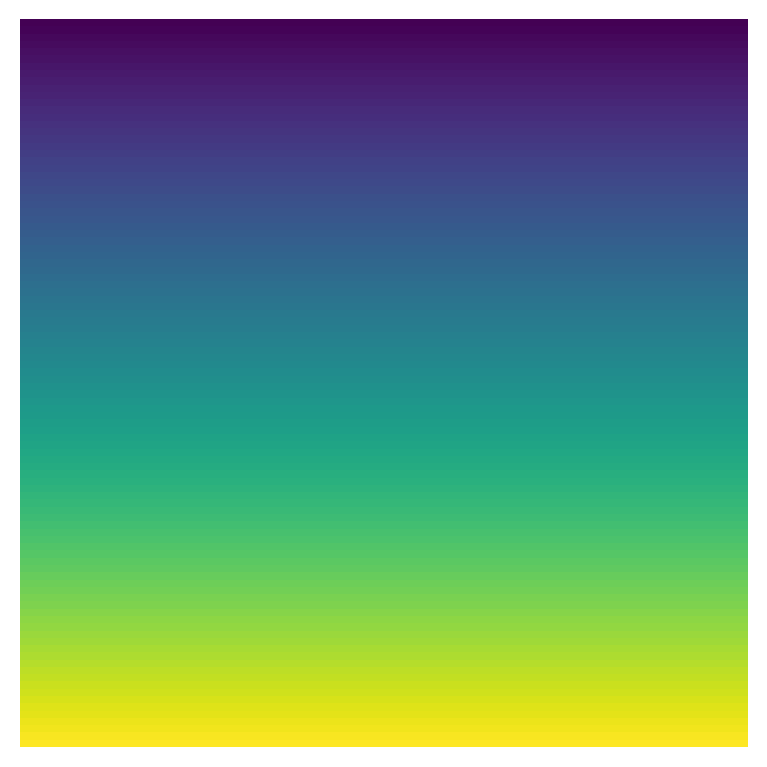

In [10]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(fd.im_conc)
ax.axis(False);

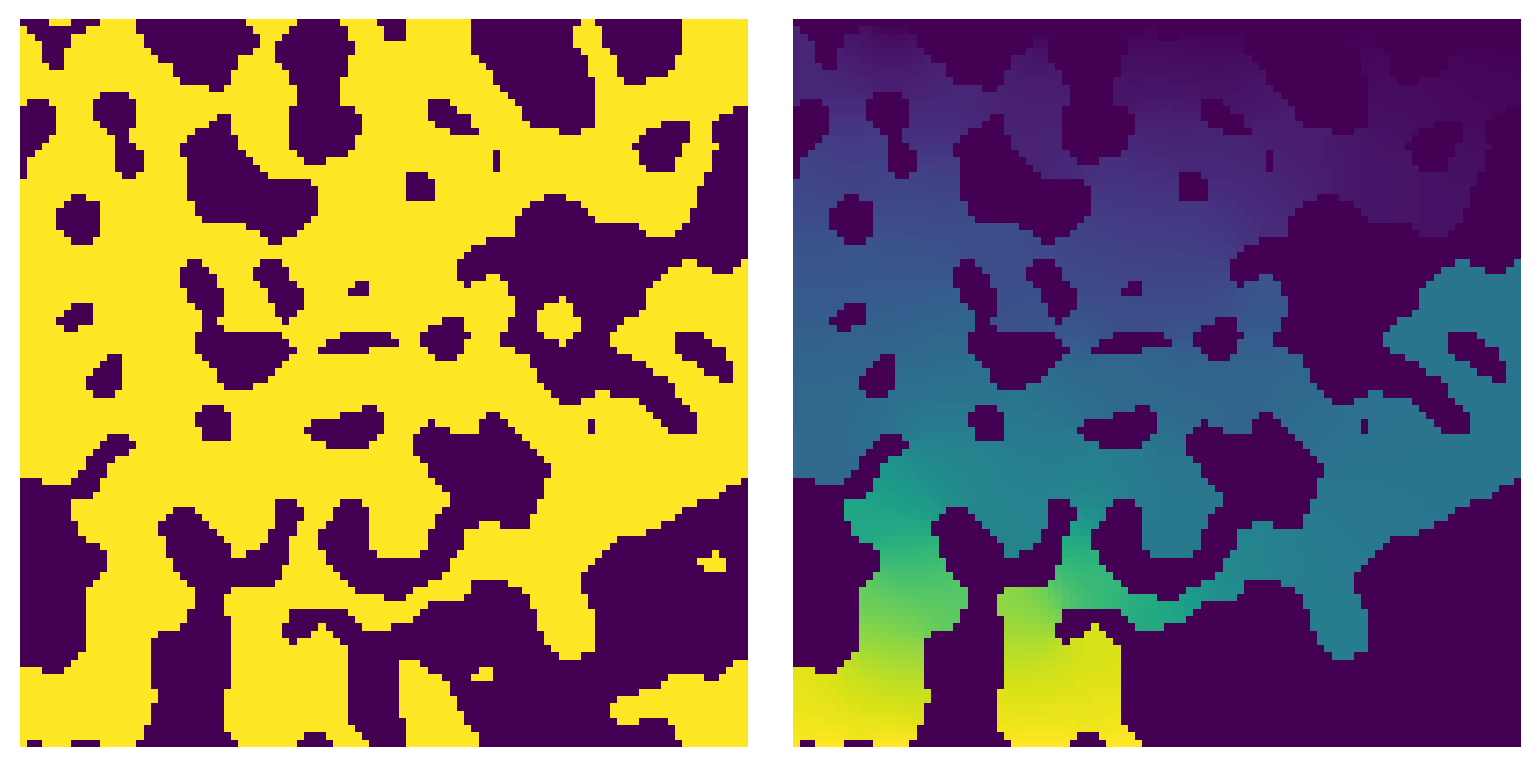

In [11]:
im = ps.generators.blobs([100, 100], porosity=0.6, seed=0)
fd = ps.simulations.tortuosity_fd(im, axis=0)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im)
ax[0].axis(False)
ax[1].imshow(fd.im_conc)
ax[1].axis(False);

## `axis`

You can specify the direction of the simulation using `axis`:

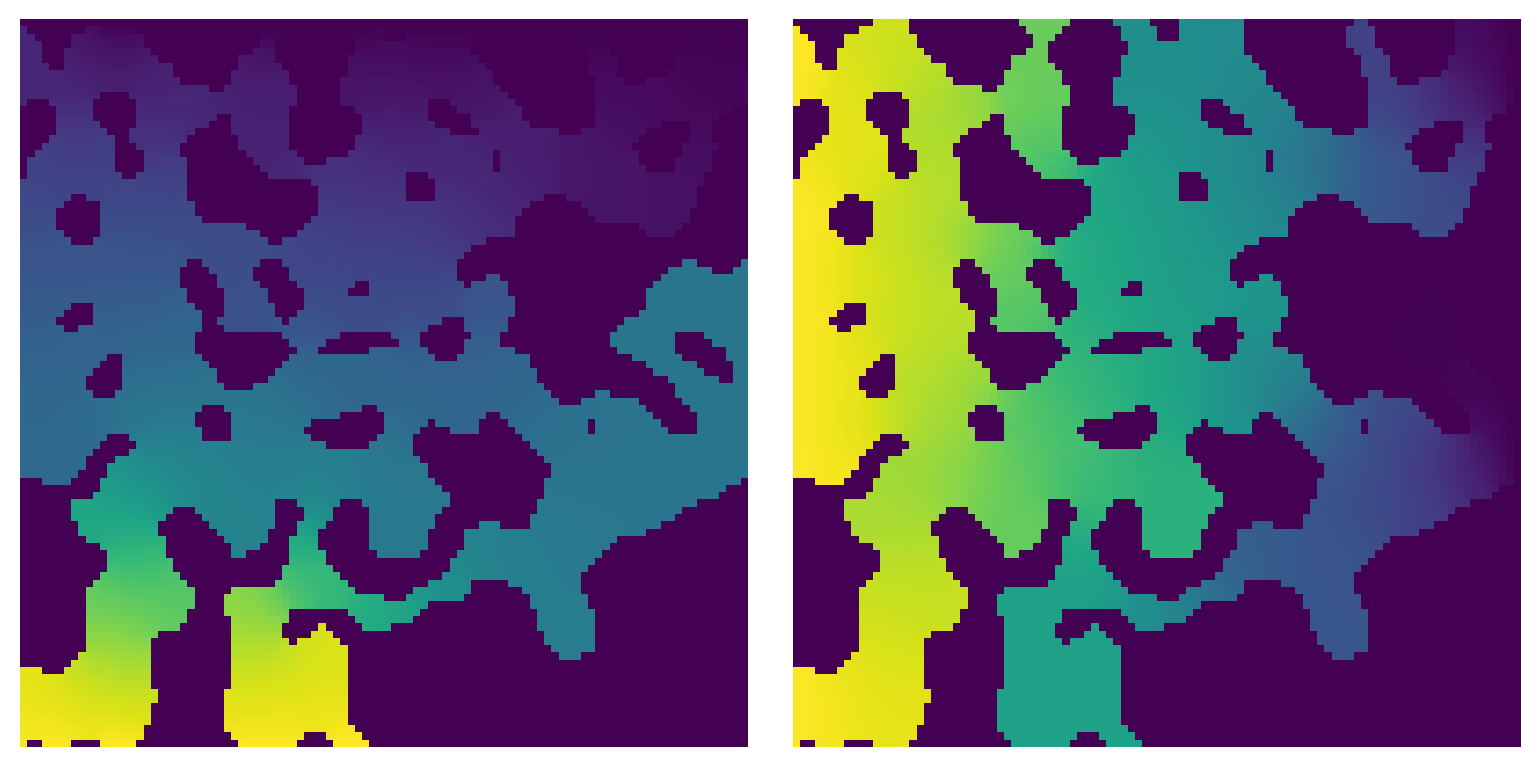

In [12]:
fd1 = ps.simulations.tortuosity_fd(im, axis=0)
fd2 = ps.simulations.tortuosity_fd(im, axis=1)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(fd1.im_conc)
ax[0].axis(False)
ax[1].imshow(fd2.im_conc)
ax[1].axis(False);

## Notes

- The returned `Results` object has several attributes include both the original porosity and the effective porosity. The latter refers to the porosity *after* filling all pores which were not connected to either inlet or outlet faces. It is worth remembering that the reported tortuosity value is computed using the *effective* value, not the original value. 
- The function uses an iterative solver to find the concentration values, and is limited to the CPU. For this reason the function can be rather slow on large images.  We recommend [TauFactor2](https://joss.theoj.org/papers/10.21105/joss.05358) which is GPU accelerated, or our new Julia package [Tortuosity.jl](https://github.com/ma-sadeghi/Tortuosity.jl)